Polynomial Regression Training RMSE: 21.75
Polynomial Regression Training R² Score: 0.01
Polynomial Regression Training MAPE: 11.94%


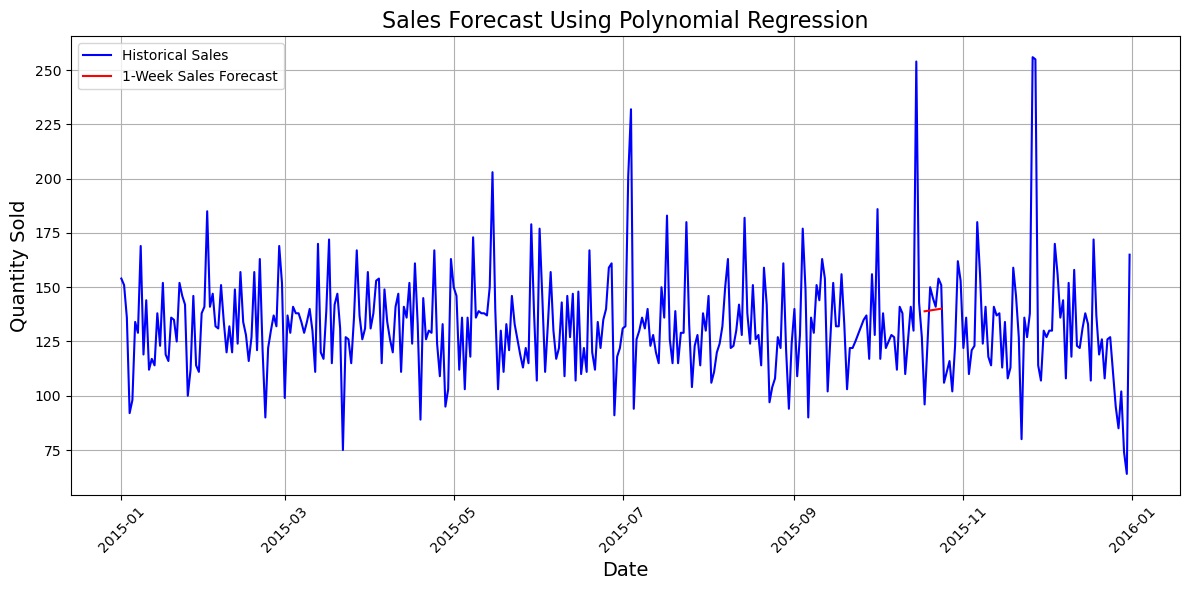

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load data function
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Fit Polynomial Regression model
def fit_regression_model(train, degree=1):
    """Fit a polynomial regression model and return the fitted model."""
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(np.arange(len(train)).reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_train_poly, train)
    return model, poly

# Evaluate Polynomial Regression model (MAPE, R²)
def evaluate_regression_model(train, model, poly):
    """Calculate RMSE, R², and MAPE for the regression model."""
    X_train_poly = poly.transform(np.arange(len(train)).reshape(-1, 1))
    y_pred = model.predict(X_train_poly)
    
    rmse = np.sqrt(mean_squared_error(train, y_pred))
    r2 = r2_score(train, y_pred)
    mape = mean_absolute_percentage_error(train, y_pred)
    
    return rmse, r2, mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast Using Polynomial Regression', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)
    
    # Step 3: Train-test split
    train_size = int(len(daily_sales) * 0.8)
    train = daily_sales['quantity'][:train_size]
    
    # Step 4: Fit Polynomial Regression model
    degree = 3  # Change to the degree suitable for your data
    model_reg, poly_reg = fit_regression_model(train, degree)
    
    # Step 5: Evaluate Polynomial Regression model
    train_rmse_reg, train_r2_reg, train_mape_reg = evaluate_regression_model(train, model_reg, poly_reg)
    print(f"Polynomial Regression Training RMSE: {train_rmse_reg:.2f}")
    print(f"Polynomial Regression Training R² Score: {train_r2_reg:.2f}")
    print(f"Polynomial Regression Training MAPE: {train_mape_reg:.2%}")
    
    # Step 6: Forecast sales for the next week (7 days)
    forecast_steps = 7
    X_forecast_poly = poly_reg.transform(np.arange(len(train), len(train) + forecast_steps).reshape(-1, 1))
    sales_forecast_reg = model_reg.predict(X_forecast_poly)
    
    # Step 7: Prepare forecast for plotting
    forecast_index = pd.date_range(start=daily_sales['order_date'].iloc[train_size], periods=forecast_steps)
    forecast_df_reg = pd.DataFrame({'date': forecast_index, 'predicted_sales': sales_forecast_reg})
    
    # Step 8: Plot forecast
    plot_forecast(daily_sales, forecast_df_reg)


C:\Users\Siva\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1475
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 
Epoch 

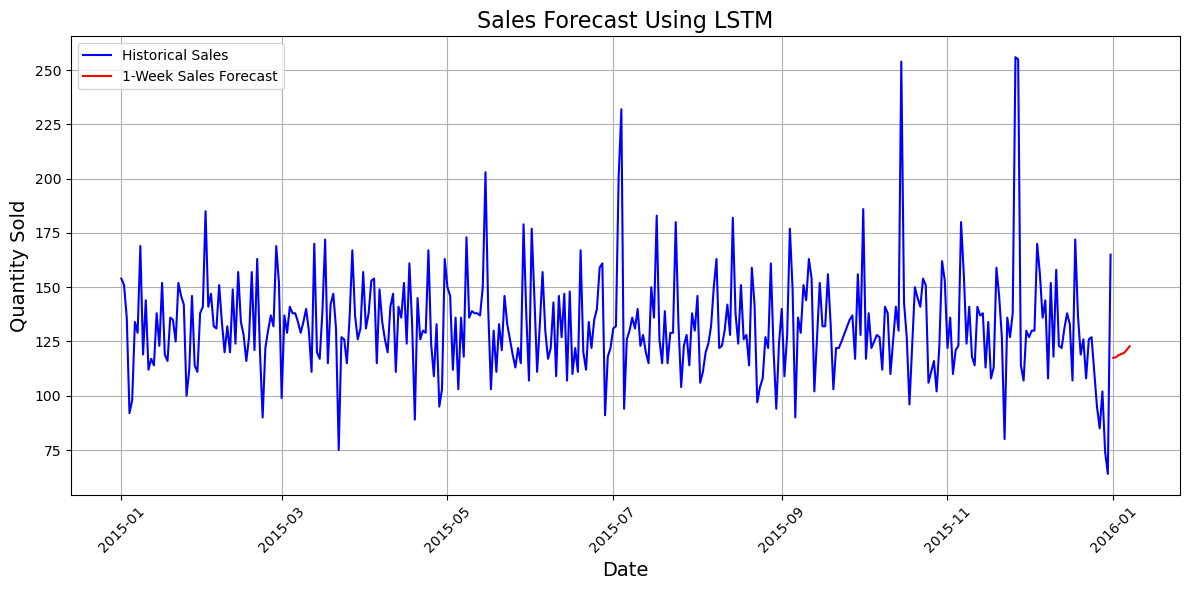

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load data function
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Create dataset for LSTM model
def create_lstm_data(data, n_steps):
    """Create dataset for LSTM model."""
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Fit LSTM model
def fit_lstm_model(X_train, y_train, n_units=50, epochs=20, batch_size=32):
    """Fit an LSTM model and return the fitted model."""
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(n_units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

# Evaluate LSTM model (MAPE, R²)
def evaluate_lstm_model(train, model, scaler, n_steps):
    """Calculate RMSE, R², and MAPE for the LSTM model."""
    scaled_train = scaler.inverse_transform(train)
    predicted_train = []
    for i in range(n_steps, len(train)):
        last_sequence = train[i-n_steps:i].reshape(1, n_steps, 1)
        predicted_train.append(model.predict(last_sequence)[0, 0])
    predicted_train = scaler.inverse_transform(np.array(predicted_train).reshape(-1, 1)).flatten()
    
    rmse = np.sqrt(mean_squared_error(scaled_train[n_steps:], predicted_train))
    r2 = r2_score(scaled_train[n_steps:], predicted_train)
    mape = mean_absolute_percentage_error(scaled_train[n_steps:], predicted_train)
    
    return rmse, r2, mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast Using LSTM', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)
    
    # Step 3: Scale and prepare data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train = scaler.fit_transform(daily_sales['quantity'].values.reshape(-1, 1))
    
    # Step 4: Create LSTM data
    n_steps = 10
    X_train, y_train = create_lstm_data(scaled_train, n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    
    # Step 5: Fit LSTM model
    model_lstm = fit_lstm_model(X_train, y_train)
    
    # Step 6: Evaluate LSTM model
    train_rmse_lstm, train_r2_lstm, train_mape_lstm = evaluate_lstm_model(scaled_train, model_lstm, scaler, n_steps)
    print(f"LSTM Training RMSE: {train_rmse_lstm:.2f}")
    print(f"LSTM Training R² Score: {train_r2_lstm:.2f}")
    print(f"LSTM Training MAPE: {train_mape_lstm:.2%}")
    
    # Step 7: Forecast sales for the next week (7 days)
    forecast_steps = 7
    last_sequence = scaled_train[-n_steps:].reshape(1, n_steps, 1)
    sales_forecast_lstm = []
    for _ in range(forecast_steps):
        predicted_sales = model_lstm.predict(last_sequence)[0, 0]
        sales_forecast_lstm.append(predicted_sales)
        last_sequence = np.append(last_sequence[:, 1:, :], [[[predicted_sales]]], axis=1)
    
    # Inverse scale the forecast
    sales_forecast_lstm = scaler.inverse_transform(np.array(sales_forecast_lstm).reshape(-1, 1))
    
    # Step 8: Prepare forecast for plotting
    forecast_index = pd.date_range(start=daily_sales['order_date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)
    forecast_df_lstm = pd.DataFrame({'date': forecast_index, 'predicted_sales': sales_forecast_lstm.ravel()})
    
    # Step 9: Plot forecast
    plot_forecast(daily_sales, forecast_df_lstm)


12:29:42 - cmdstanpy - INFO - Chain [1] start processing
12:29:42 - cmdstanpy - INFO - Chain [1] done processing


Prophet Training RMSE: 17.77
Prophet Training R² Score: 0.34
Prophet Training MAPE: 9.27%


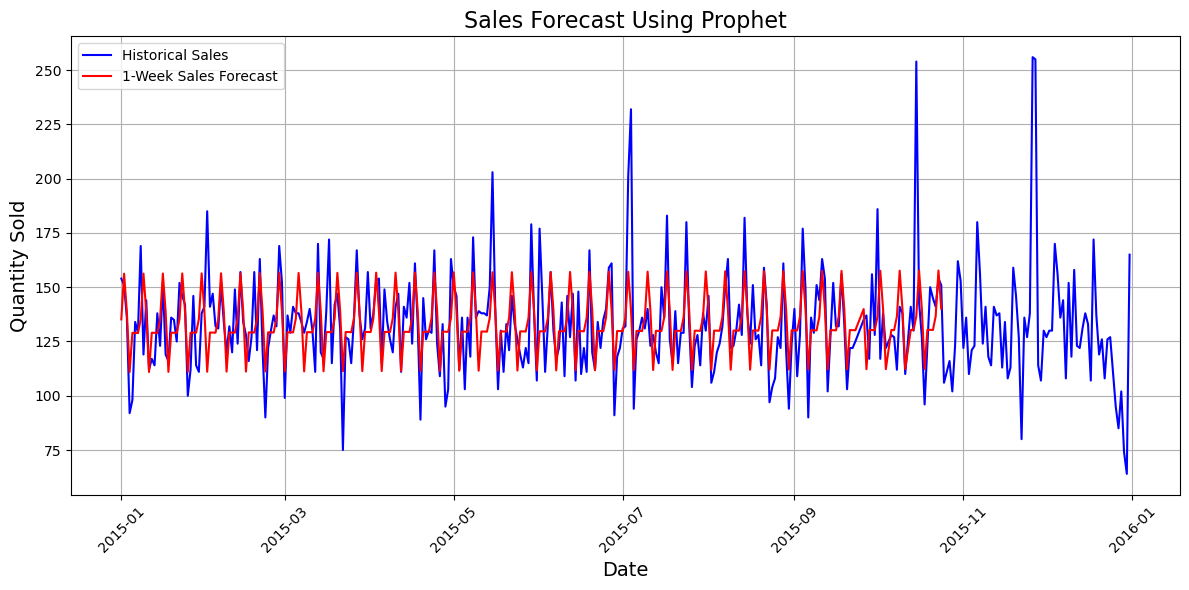

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Load data function
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Prepare data for Prophet
def prepare_prophet_data(daily_sales):
    """Prepare data for Prophet model."""
    return daily_sales.rename(columns={'order_date': 'ds', 'quantity': 'y'})

# Evaluate model performance (MAPE, R²)
def evaluate_prophet_model(train, forecast):
    """Calculate RMSE, R², and MAPE for Prophet model."""
    y_true = train['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return rmse, r2, mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast Using Prophet', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)
    
    # Step 3: Prepare Prophet data
    prophet_sales_data = prepare_prophet_data(daily_sales)
    train_size = int(len(prophet_sales_data) * 0.8)
    train_prophet = prophet_sales_data[:train_size]
    
    # Step 4: Fit Prophet model
    model_prophet = Prophet()
    model_prophet.fit(train_prophet)
    
    # Step 5: Forecast sales for the next week (7 days)
    future_dates = model_prophet.make_future_dataframe(periods=7)
    forecast_prophet = model_prophet.predict(future_dates)
    
    # Step 6: Evaluate model
    train_rmse_prophet, train_r2_prophet, train_mape_prophet = evaluate_prophet_model(train_prophet, forecast_prophet)
    print(f"Prophet Training RMSE: {train_rmse_prophet:.2f}")
    print(f"Prophet Training R² Score: {train_r2_prophet:.2f}")
    print(f"Prophet Training MAPE: {train_mape_prophet:.2%}")
    
    # Prepare forecast for plotting
    forecast_df_prophet = forecast_prophet[['ds', 'yhat']].rename(columns={'ds': 'date', 'yhat': 'predicted_sales'})
    
    # Step 7: Plot forecast
    plot_forecast(daily_sales, forecast_df_prophet)


ARIMA Training RMSE: 23.82
ARIMA Training R² Score: -0.19
ARIMA Training MAPE: 12.36%


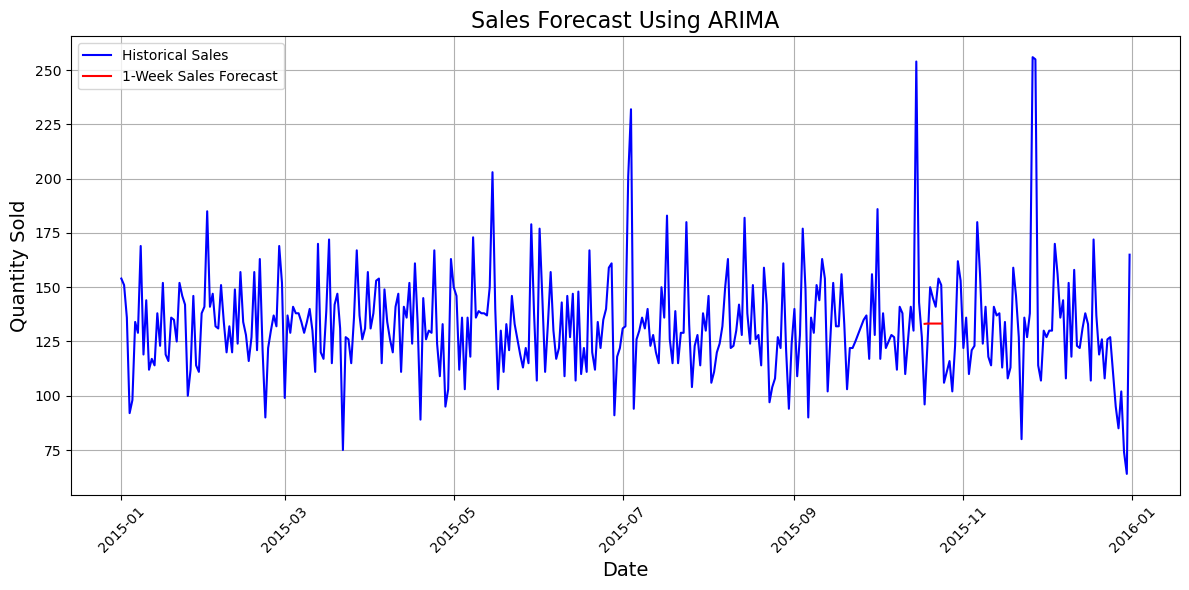

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Function to load data
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Fit ARIMA Model
def fit_arima_model(train, order):
    """Fit the ARIMA model and return the fitted model."""
    model = ARIMA(train, order=order)
    return model.fit()

# Evaluate model performance (RMSE, R², MAPE)
def evaluate_model(train, model_fit):
    """Calculate and return RMSE, R², and MAPE for the training data."""
    y_true = train
    y_pred = model_fit.fittedvalues
    
    train_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    train_r2 = r2_score(y_true, y_pred)
    train_mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return train_rmse, train_r2, train_mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast Using ARIMA', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)
    
    # Step 3: Train-test split
    train_size = int(len(daily_sales) * 0.8)
    train = daily_sales['quantity'][:train_size]
    
    # Step 4: Fit ARIMA model
    order_arima = (1, 1, 1)  # Change to the best parameter for your dataset
    model_arima_fit = fit_arima_model(train, order_arima)
    
    # Step 5: Forecast sales for the next week (7 days)
    forecast_steps = 7
    sales_forecast_arima = model_arima_fit.forecast(steps=forecast_steps)
    
    # Prepare forecast index for plotting
    forecast_index = pd.date_range(start=daily_sales['order_date'].iloc[train_size], periods=forecast_steps)
    forecast_df_arima = pd.DataFrame({'date': forecast_index, 'predicted_sales': sales_forecast_arima})
    
    # Step 6: Evaluate model
    train_rmse_arima, train_r2_arima, train_mape_arima = evaluate_model(train, model_arima_fit)
    print(f"ARIMA Training RMSE: {train_rmse_arima:.2f}")
    print(f"ARIMA Training R² Score: {train_r2_arima:.2f}")
    print(f"ARIMA Training MAPE: {train_mape_arima:.2%}")
    
    # Step 7: Plot forecast
    plot_forecast(daily_sales, forecast_df_arima)


C:\Users\Siva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Siva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA Training RMSE: 19.69
SARIMA Training R² Score: 0.19
SARIMA Training MAPE: 10.93%


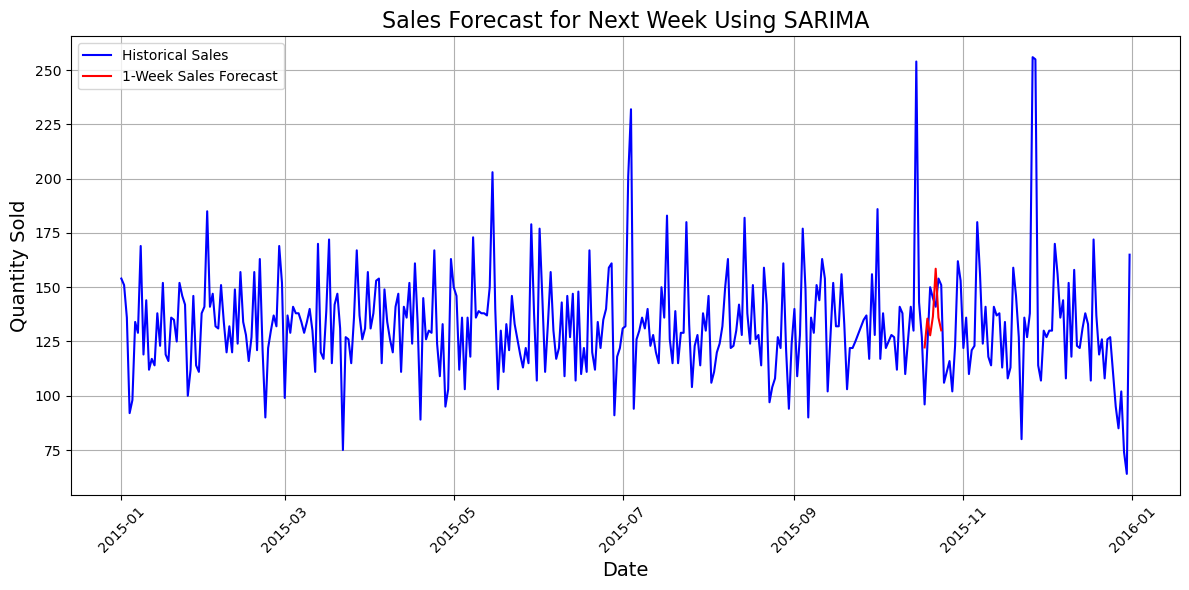

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load data function
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Fit SARIMA model
def fit_sarima_model(train, order, seasonal_order):
    """Fit the SARIMA model and return the fitted model."""
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, trend='c')
    return model.fit(disp=False)

# Evaluate SARIMA model (MAPE, R²)
def evaluate_model(train, model_fit):
    """Calculate RMSE, R², and MAPE for the SARIMA model."""
    y_true = train
    y_pred = model_fit.fittedvalues
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return rmse, r2, mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast for Next Week Using SARIMA', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)

    # Step 3: Train-test split
    train_size = int(len(daily_sales) * 0.8)
    train = daily_sales['quantity'][:train_size]

    # Step 4: Fit SARIMA model with best parameters found
    order = (1, 0, 3)  # Adjust these parameters based on model tuning
    seasonal_order = (2, 0, 1, 7)
    model_sarima_fit = fit_sarima_model(train, order, seasonal_order)

    # Step 5: Forecast sales for the next week (7 days)
    forecast_steps = 7
    sales_forecast_sarima = model_sarima_fit.forecast(steps=forecast_steps)

    # Prepare forecast index for plotting
    forecast_index = pd.date_range(start=daily_sales['order_date'].iloc[train_size], periods=forecast_steps)
    forecast_df_sarima = pd.DataFrame({'date': forecast_index, 'predicted_sales': sales_forecast_sarima})

    # Step 6: Evaluate SARIMA model
    train_rmse_sarima, train_r2_sarima, train_mape_sarima = evaluate_model(train, model_sarima_fit)
    print(f"SARIMA Training RMSE: {train_rmse_sarima:.2f}")
    print(f"SARIMA Training R² Score: {train_r2_sarima:.2f}")
    print(f"SARIMA Training MAPE: {train_mape_sarima:.2%}")
    
    # Step 7: Plot forecast
    plot_forecast(daily_sales, forecast_df_sarima)


C:\Users\Siva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Siva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA Training RMSE: 19.69
SARIMA Training R² Score: 0.19
SARIMA Training MAPE: 10.93%


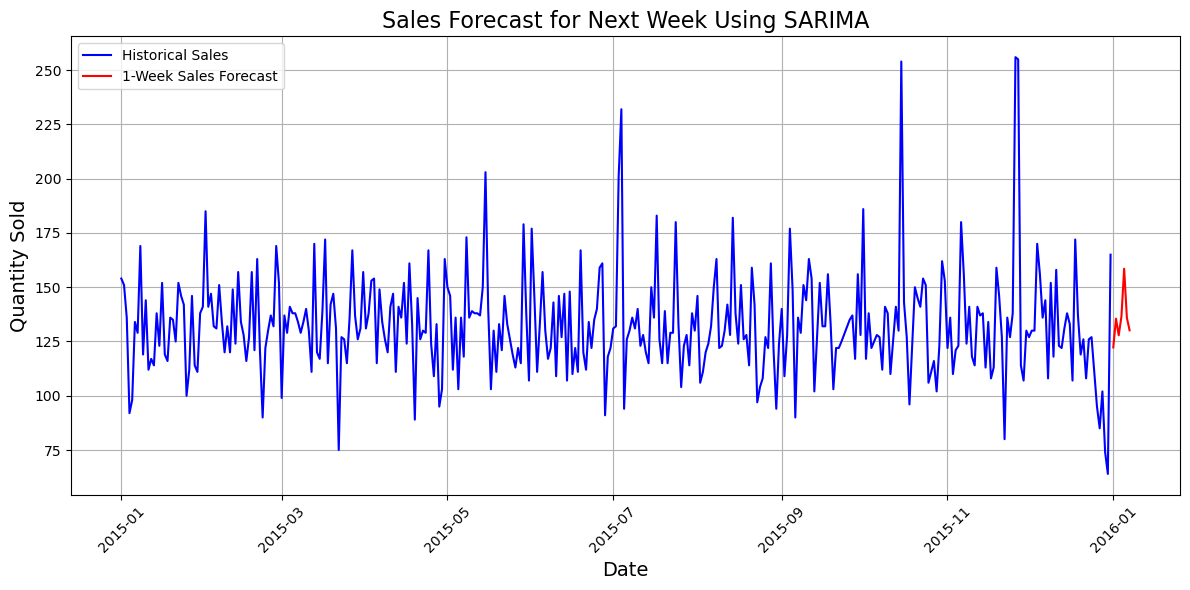

Purchase order saved to 'ingredient_purchase_order.xlsx'.


In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load data function
def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        sales_data = pd.read_csv(file_path)
        sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
        return sales_data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare daily sales data
def prepare_daily_sales(sales_data):
    """Aggregate sales data to daily totals."""
    return sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

# Fit SARIMA model
def fit_sarima_model(train, order, seasonal_order):
    """Fit the SARIMA model and return the fitted model."""
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, trend='c')
    return model.fit(disp=False)

# Evaluate SARIMA model
def evaluate_model(train, model_fit):
    """Calculate RMSE, R², and MAPE for the SARIMA model."""
    y_true = train
    y_pred = model_fit.fittedvalues
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return rmse, r2, mape

# Plotting the forecast
def plot_forecast(daily_sales, forecast_df):
    """Plot historical sales and forecasted sales."""
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['order_date'], daily_sales['quantity'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='1-Week Sales Forecast', color='red')
    plt.title('Sales Forecast for Next Week Using SARIMA', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity Sold', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 1: Load the sales data
sales_data = load_data('D:/project 5/new/cleaned_pizza2.csv')
if sales_data is not None:
    # Step 2: Prepare daily sales data
    daily_sales = prepare_daily_sales(sales_data)

    # Step 3: Train-test split
    train_size = int(len(daily_sales) * 0.8)
    train = daily_sales['quantity'][:train_size]

    # Step 4: Fit SARIMA model with best parameters found
    order = (1, 0, 3)  # Adjust these parameters based on model tuning
    seasonal_order = (2, 0, 1, 7)
    model_sarima_fit = fit_sarima_model(train, order, seasonal_order)

    # Step 5: Forecast sales for the next 7 days beyond the last date in the dataset
    forecast_steps = 7
    last_date = daily_sales['order_date'].max()  # Get the last date in the dataset
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)  # Forecast starts after last date
    
    # Forecasting sales
    sales_forecast_sarima = model_sarima_fit.forecast(steps=forecast_steps)

    # Prepare forecast data for plotting
    forecast_df_sarima = pd.DataFrame({'date': forecast_index, 'predicted_sales': sales_forecast_sarima})

    # Step 6: Evaluate SARIMA model
    train_rmse_sarima, train_r2_sarima, train_mape_sarima = evaluate_model(train, model_sarima_fit)
    print(f"SARIMA Training RMSE: {train_rmse_sarima:.2f}")
    print(f"SARIMA Training R² Score: {train_r2_sarima:.2f}")
    print(f"SARIMA Training MAPE: {train_mape_sarima:.2%}")
    
    # Step 7: Plot forecast
    plot_forecast(daily_sales, forecast_df_sarima)

    # Step 8: Load ingredient data
    ingredient_data = pd.read_csv('D:/project 5/new/cleaned_ingredients.csv')  # Replace with your ingredient data file path

    # Step 9: Calculate required ingredient quantities based on predicted sales
    # Step 9: Calculate required ingredient quantities based on predicted sales
    required_ingredients = pd.DataFrame()

    # Assuming that you want to distribute the forecast sales across pizzas and calculate ingredients accordingly
    for index, predicted_sales in enumerate(sales_forecast_sarima):
        ingredients = ingredient_data.copy()  # Copy to iterate over
        # Assuming that 'Items_Qty_In_Grams' is the amount of each ingredient needed per unit sold
        # Adjust the calculation as per your data structure
        ingredients['required_quantity'] = (ingredients['Items_Qty_In_Grams'] * (predicted_sales / len(ingredients))).round()  # Distributing and rounding sales
    
        # Add date to the ingredient calculations
        ingredients['forecast_date'] = forecast_index[index]
        required_ingredients = pd.concat([required_ingredients, ingredients], ignore_index=True)

    # Step 10: Group by ingredient name to sum the required quantities, rounding to the nearest integer
    purchase_order = required_ingredients.groupby('pizza_ingredients').agg({'required_quantity': 'sum'}).reset_index()

    # Round the final required quantities in the purchase order
    purchase_order['required_quantity'] = purchase_order['required_quantity'].round()

    # Step 11: Save purchase order to Excel
    purchase_order.to_csv('ingredient_purchase_order.csv', index=False)
    print("Purchase order saved to 'ingredient_purchase_order.xlsx'.")

